In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
import os
import tensorflow as tf

In [ ]:
os.listdir("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set")

['Normal cases', 'Bengin cases', 'Malignant cases']

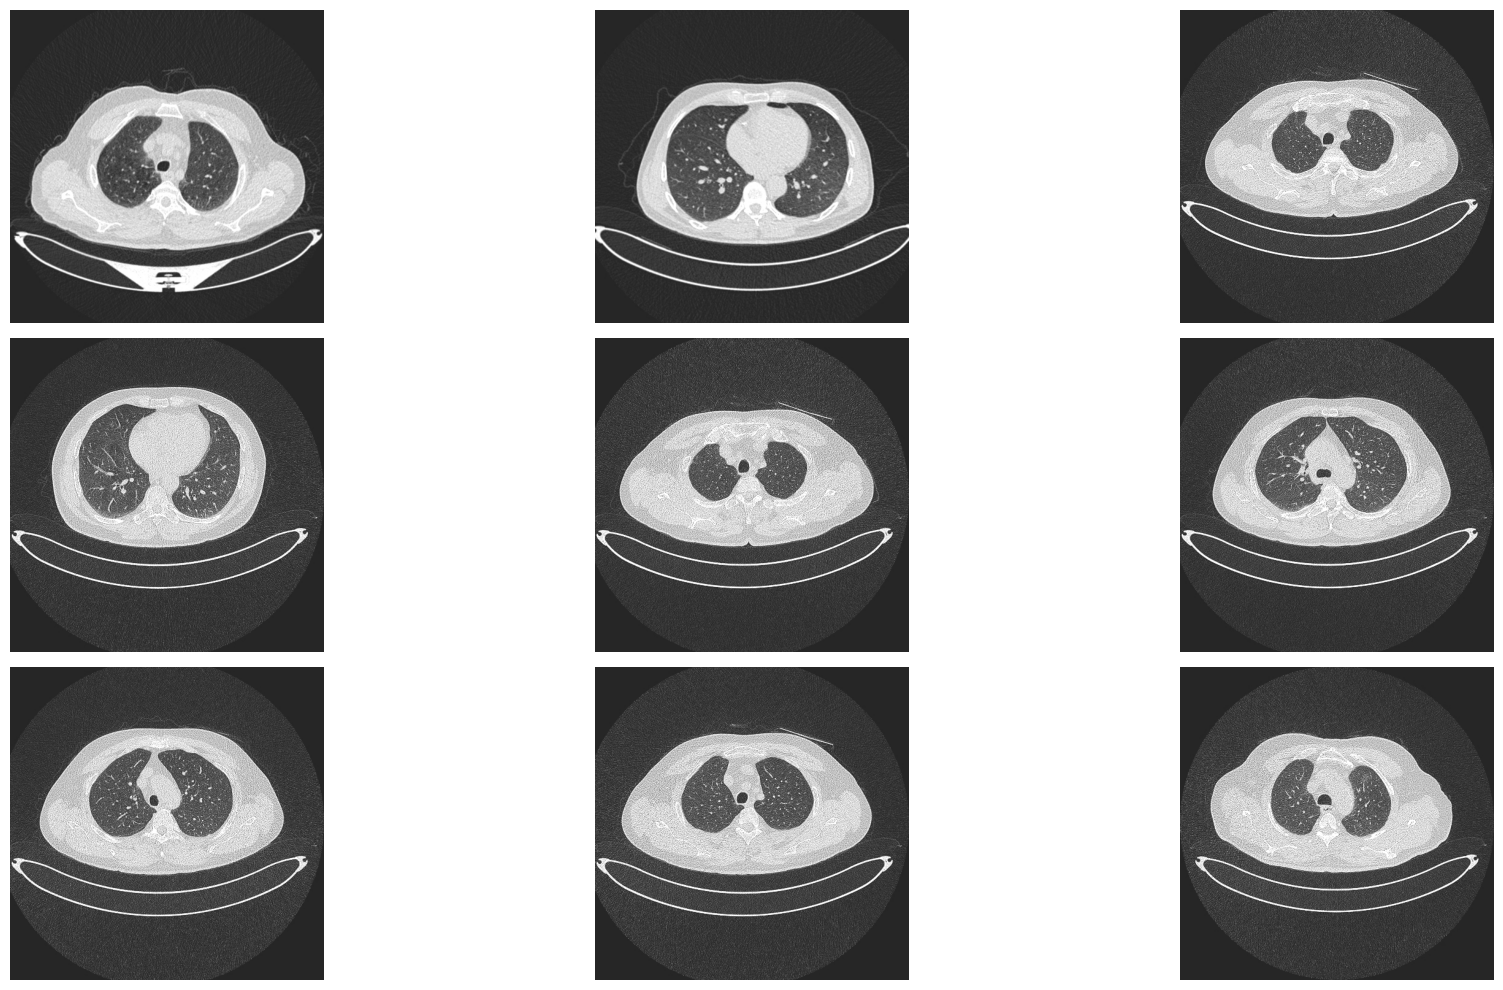

In [ ]:
normal = os.listdir("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Normal cases")
normal_dir = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Normal cases"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

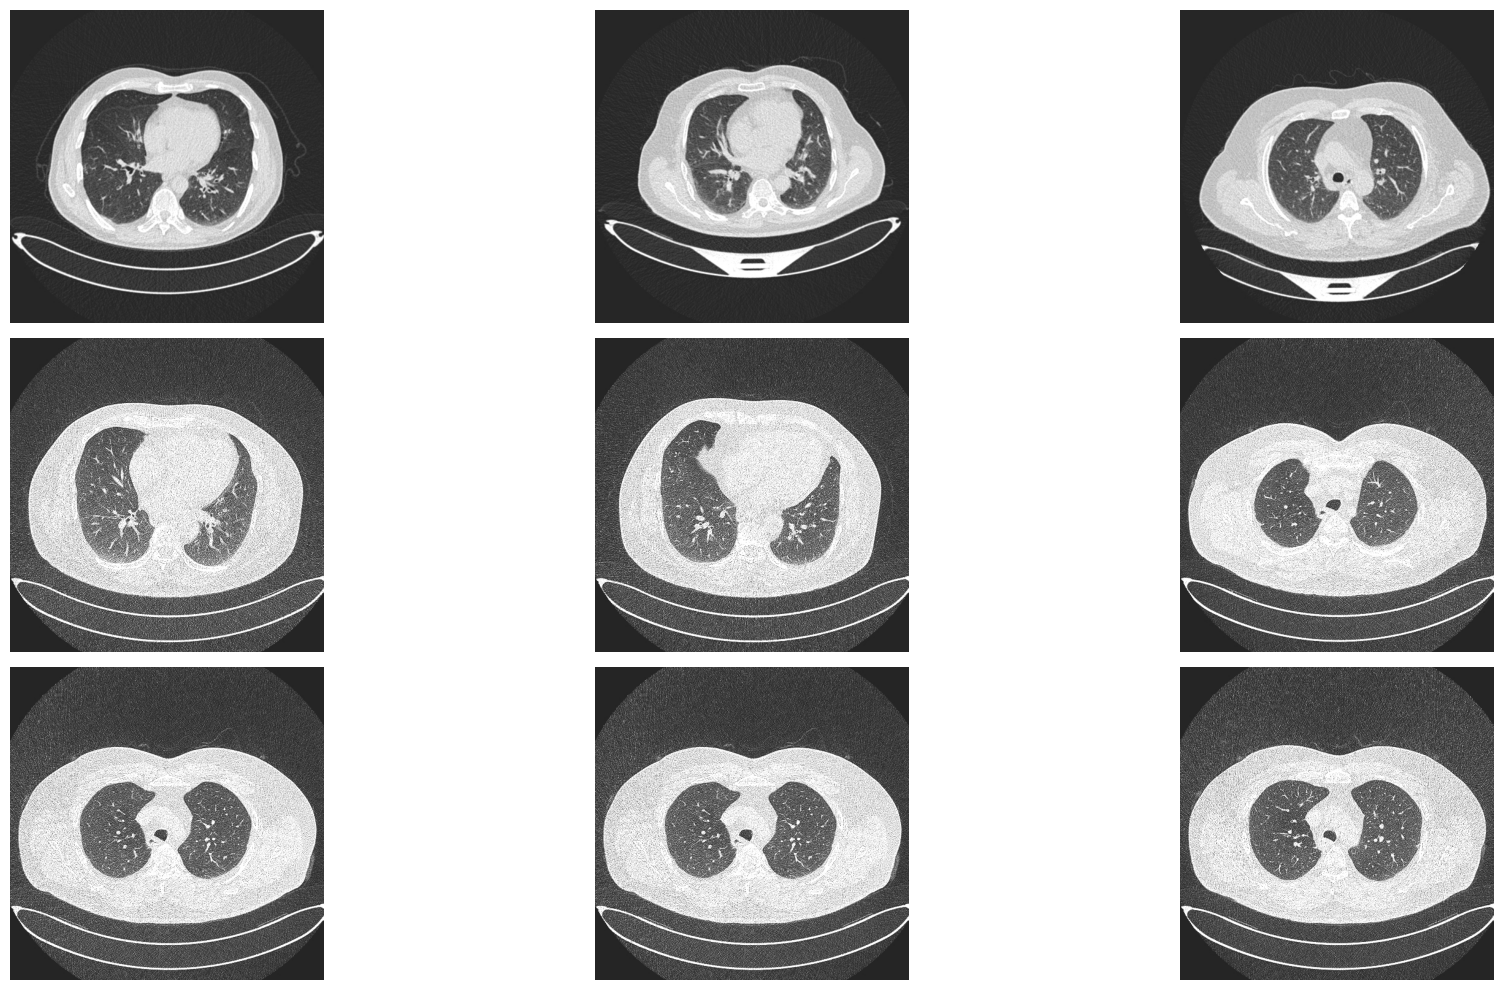

In [ ]:
bengin = os.listdir("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Bengin cases")
bengin_dir = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Bengin cases"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(bengin_dir, bengin[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

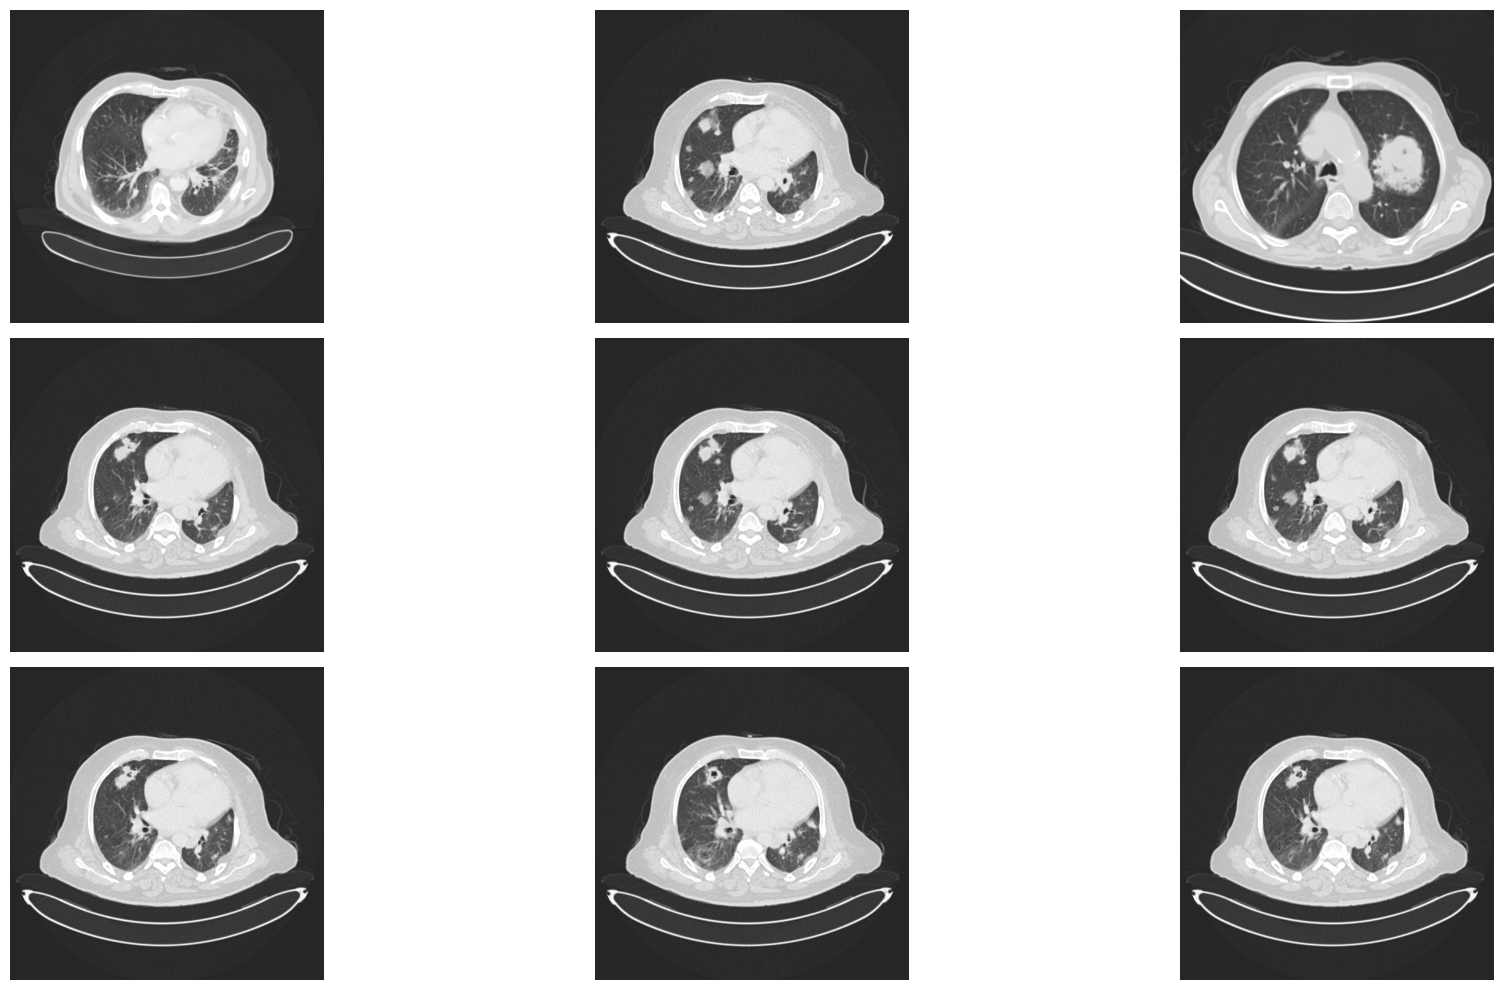

In [ ]:
malignant = os.listdir("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Malignant cases")
malignant_dir = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set/Malignant cases"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(malignant_dir, malignant[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
from skimage.io import imread, imshow
image_ran = imread(os.path.join(normal_dir, normal[0]))
image_ran.shape

(512, 512, 3)

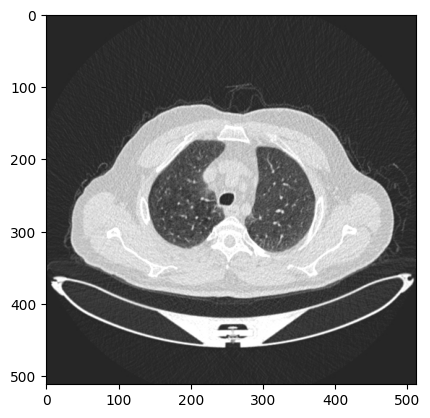

In [ ]:
plt.imshow(image_ran)

In [ ]:
train_dir = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/train_set'
val_dir = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/val_set'
test_dir = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/test_set'

# Image Preprocessing

In [ ]:
batch_size = 16
IMG_SHAPE = 224

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      zoom_range=0.5,
      horizontal_flip=True,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.1,
      samplewise_center=True,
      samplewise_std_normalization=True
)

# Image Generator

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 939 images belonging to 3 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

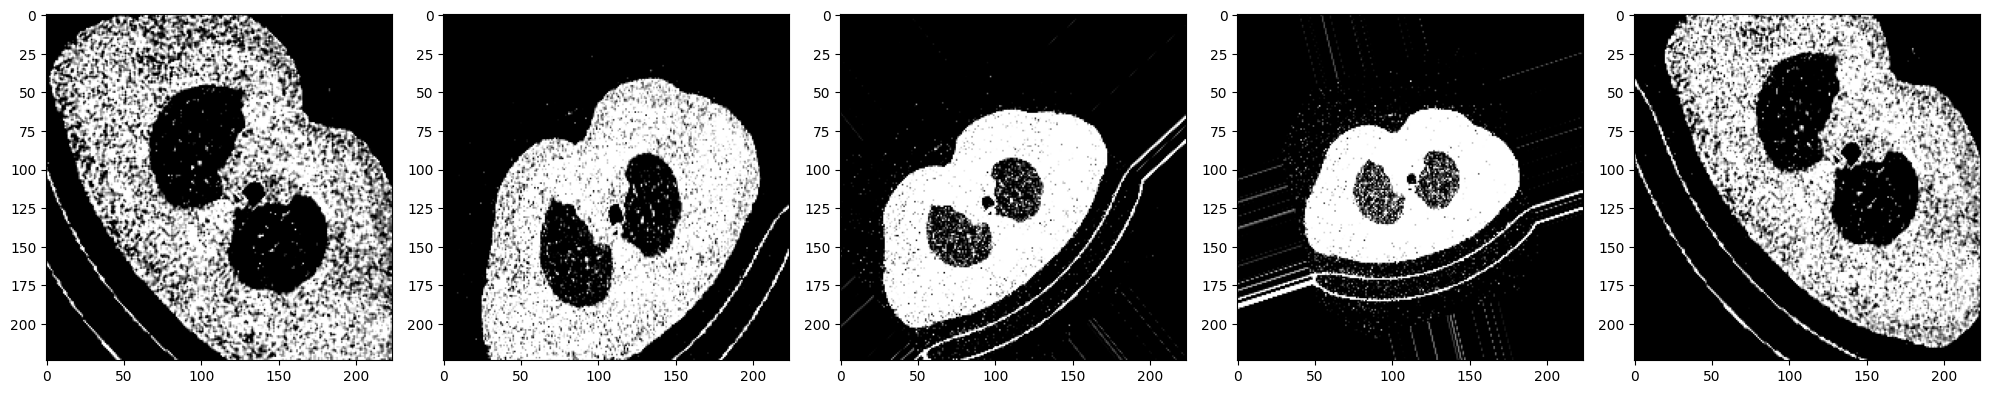

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 175 images belonging to 3 classes.


# Fine-tunning VGG16

In [ ]:
import tensorflow as tf

In [ ]:
vgg16_model = tf.keras.applications.VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.engine.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
new_layers = model.layers[:-1]

In [ ]:
new_layers

In [ ]:
model_new = tf.keras.Sequential(new_layers)


In [ ]:
model_new.build(input_shape=(None, 224, 224, 3))

In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for layer in model_new.layers:
  layer.trainable = False

In [ ]:
model_new.add(Dense(3, activation='softmax'))

In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# Training the model

In [ ]:
model_new.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
EPOCHS = 10
history = model_new.fit(train_data_gen,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


59/59 [==============================] - 473s 8s/step - loss: 0.9736 - accuracy: 0.5921 - val_loss: 0.8068 - val_accuracy: 0.5429
Epoch 2/10
59/59 [==============================] - 453s 8s/step - loss: 0.6251 - accuracy: 0.7657 - val_loss: 0.7321 - val_accuracy: 0.7086
Epoch 3/10
59/59 [==============================] - 462s 8s/step - loss: 0.5586 - accuracy: 0.8062 - val_loss: 0.8353 - val_accuracy: 0.6171
Epoch 4/10
59/59 [==============================] - 461s 8s/step - loss: 0.5220 - accuracy: 0.8275 - val_loss: 0.6649 - val_accuracy: 0.7314
Epoch 5/10
59/59 [==============================] - 462s 8s/step - loss: 0.5470 - accuracy: 0.8115 - val_loss: 1.0454 - val_accuracy: 0.4800
Epoch 6/10
59/59 [==============================] - 450s 8s/step - loss: 0.4885 - accuracy: 0.8072 - val_loss: 0.9035 - val_accuracy: 0.5486
Epoch 7/10
59/59 [==============================] - 449s 8s/step - loss: 0.4834 - accuracy: 0.8200 - val_loss: 1.1269 - val_accuracy: 0.4971
Epoch 8/10
59/59 [======

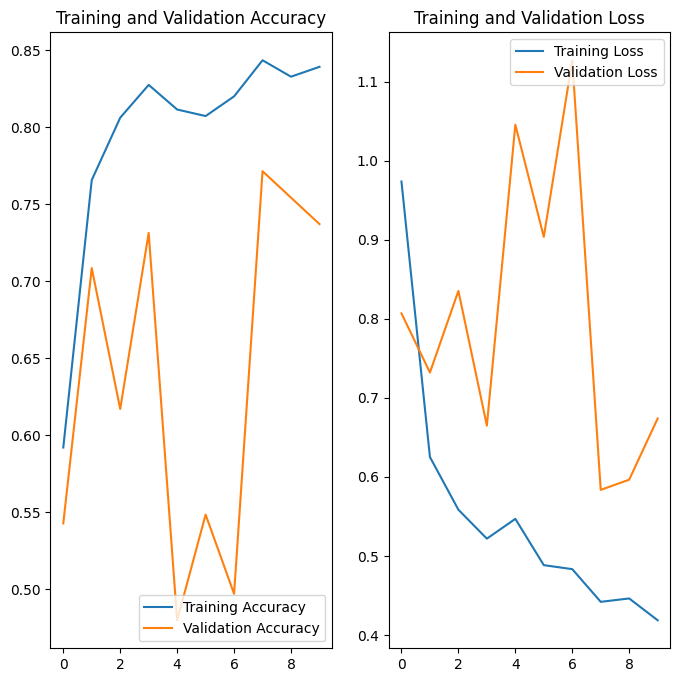

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_new.save_weights('VGG16.h5')

In [ ]:
model_json = model_new.to_json()

In [ ]:
with open('VGG16.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
import shutil

In [ ]:
shutil.move('/content/VGG16.h5', '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/models')

'/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/models/VGG16.h5'

In [ ]:
shutil.move('/content/VGG16.json', '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/models')

'/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/models/VGG16.json'